In [1]:
import numpy as np
import pandas as pd

# Dataset

In this homework, we will use Credit Card Data from book "Econometric Analysis".

Here's a wget-able link:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column card).

# Preparation
* Create the target variable by mapping <code>yes</code> to 1 and <code>no</code> to 0.
* Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use <code>train_test_split</code> funciton for that with <code>random_state=1</code>.

In [2]:
df = pd.read_csv('AER_credit_card_data.csv')
df

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [5]:
df[['card', 'owner', 'selfemp']] = df[['card', 'owner', 'selfemp']].replace(to_replace=['no', 'yes'], value=[0, 1])

In [6]:
df

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1,0,33.58333,4.5660,0.002146,7.333333,1,0,0,94,1,19
1315,0,5,23.91667,3.1920,0.000376,0.000000,0,0,3,12,1,5
1316,1,0,40.58333,4.6000,0.026513,101.298300,1,0,2,1,1,2
1317,1,0,32.83333,3.7000,0.008999,26.996670,0,1,0,60,1,7


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

del df_train['card']
del df_val['card']
del df_test['card']

In [9]:
len(df_train), len(df_val), len(df_test)

(791, 264, 264)

In [10]:
len(y_train), len(y_val), len(y_test)

(791, 264, 264)

# Question 1
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

* For each numerical variable, use it as score and compute AUC with the `card` variable.
* Use the training dataset for that.
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenditure']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

* `reports`
* `dependents`
* `active`
* **`share`**

In [12]:
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [17]:
df.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [18]:
numeric = ['reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active']

In [20]:
for i in numeric:
    print(i, ':', roc_auc_score(y_train, df_train[i]))

reports : 0.28333701393106236
age : 0.4759979020592945
income : 0.5908049467233478
share : 0.989183643423692
expenditure : 0.991042345276873
owner : 0.5856751136384548
selfemp : 0.49020040854634794
dependents : 0.46722427722262094
months : 0.470578221903237
majorcards : 0.5343859842838476
active : 0.6043173411362006


In [21]:
roc_auc_score(y_train, df_train.share)

0.989183643423692

# Training the model
From now on, use these columns only:
```Python
["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]
```
Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:
```Python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

In [23]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [25]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[numeric].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [26]:
val_dict = df_val[numeric].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
decision = (y_pred >= 0.5)
(y_val == decision).mean()

0.9696969696969697

In [27]:
roc_auc_score(y_val, y_pred)

0.9949923991773226

# Question 2
What's the AUC of this model on the validation dataset? (round to 3 digits)

* 0.615
* 0.515
* 0.715
* **0.995**

# Question 3
Now let's compute precision and recall for our model.

* Evaluate the model on the validation dataset on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.1
* **0.3**
* 0.6
* 0.8

In [29]:
#function to put predictions and get dataframe
def d_r_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)  
    df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    
    return df_scores

In [31]:
q3 = d_r_dataframe(y_val, y_pred)
q3

,threshold,tp,fp,fn,tn,precision,recall
0,0.00,211,53,0,0,0.799242,1.000000
1,0.01,211,34,0,19,0.861224,1.000000
2,0.02,211,32,0,21,0.868313,1.000000
3,0.03,211,23,0,30,0.901709,1.000000
4,0.04,211,23,0,30,0.901709,1.000000
...,...,...,...,...,...,...,...
96,0.96,203,0,8,53,1.000000,0.962085
97,0.97,203,0,8,53,1.000000,0.962085
98,0.98,202,0,9,53,1.000000,0.957346
99,0.99,200,0,11,53,1.000000,0.947867


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

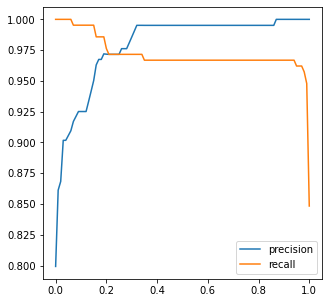

In [37]:
plt.figure(figsize=(5,5))
plt.plot(q3.threshold, q3['precision'], label='precision')
plt.plot(q3.threshold, q3['recall'], label='recall')
plt.legend();

# Question 4
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing $F_1$:

$$
F_1={2}\cdot{\frac{{P}\cdot{R}}{P + R}}
$$ 

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01 using the validation set

At which threshold F1 is maximal?

* 0.1
* **0.4**
* 0.6
* 0.7

In [38]:
q3['F1'] = 2 * ((q3.precision*q3.recall)/(q3.precision+q3.recall))
q3

,threshold,tp,fp,fn,tn,precision,recall,F1
0,0.00,211,53,0,0,0.799242,1.000000,0.888421
1,0.01,211,34,0,19,0.861224,1.000000,0.925439
2,0.02,211,32,0,21,0.868313,1.000000,0.929515
3,0.03,211,23,0,30,0.901709,1.000000,0.948315
4,0.04,211,23,0,30,0.901709,1.000000,0.948315
...,...,...,...,...,...,...,...,...
96,0.96,203,0,8,53,1.000000,0.962085,0.980676
97,0.97,203,0,8,53,1.000000,0.962085,0.980676
98,0.98,202,0,9,53,1.000000,0.957346,0.978208
99,0.99,200,0,11,53,1.000000,0.947867,0.973236


In [41]:
q3[q3['F1'] == q3['F1'].max()]

,threshold,tp,fp,fn,tn,precision,recall,F1
32,0.32,205,1,6,52,0.995146,0.971564,0.983213
33,0.33,205,1,6,52,0.995146,0.971564,0.983213
34,0.34,205,1,6,52,0.995146,0.971564,0.983213


In [42]:
q3[q3.threshold == 0.40]

,threshold,tp,fp,fn,tn,precision,recall,F1
40,0.4,204,1,7,52,0.995122,0.966825,0.980769


In [43]:
q3[q3.threshold == 0.10]

,threshold,tp,fp,fn,tn,precision,recall,F1
10,0.1,210,17,1,36,0.92511,0.995261,0.958904


In [44]:
q3[q3.threshold == 0.60]

,threshold,tp,fp,fn,tn,precision,recall,F1
60,0.6,204,1,7,52,0.995122,0.966825,0.980769


In [50]:
q3[q3.threshold == 0.68]

,threshold,tp,fp,fn,tn,precision,recall,F1
68,0.68,204,1,7,52,0.995122,0.966825,0.980769


# Question 5
Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```
* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard devidation of the AUC scores across different folds?

* **0.003**
* 0.014
* 0.09
* 0.24

In [51]:
from sklearn.model_selection import KFold

In [52]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [60]:
def train(df_train, y_train, C):
    dicts = df_train[numeric].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [55]:
def predict(df, dv, model):
    dicts = df[numeric].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [57]:
from tqdm.auto import tqdm

In [58]:
scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.card.values
    y_val = df_val.card.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

0it [00:00, ?it/s]

In [59]:
np.std(scores)

0.0028356506168456257

# Question 6
Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

* 0.01
* 0.1
* 1
* **10**

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

In [61]:
n_splits = 5

for C in tqdm([0.01, 0.1, 1, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01 0.992 +- 0.006
C=0.1 0.994 +- 0.005
C=1 0.996 +- 0.003
C=10 0.997 +- 0.003
